In [5]:
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
DATASET_PATH = "data.json"
import tensorflow.keras as keras



In [6]:
def load_data(dataset_path):
    with open(dataset_path, 'r') as fp:
        data = json.load(fp)
#     convert lists into numpy array
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])
    return inputs,targets
# print(load_data(DATASET_PATH))
def plot_history(history):
    fig, axs = plt.subplots(2)
   
# create accuracy plot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"],label = "test accuracy")
    axs[0].set_ylabel("ACCURACY")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy Eval")
#     create error plot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"],label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error Eval")
    
    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)               

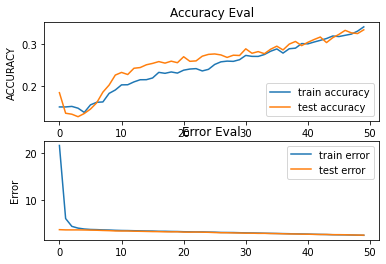

In [7]:
if __name__=="__main__":
    inputs, targets =load_data(DATASET_PATH)
#     spliting the dataset
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                         targets,
                                                                         test_size=0.3)
#     buliding the network architecture
    model = keras.Sequential([
#         input layer
        keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),
        
#         1st hidden layer
        keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
#         2nd layer
        keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
#         3rd layer,
        keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
#         output layer
        keras.layers.Dense(10, activation="softmax")
                             ])
#     compile the network 
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    model.summary()
    
    
    
#     train network
    history=model.fit(inputs_train, targets_train,
              validation_data=(inputs_test,targets_test),
             epochs=50,
             batch_size=32)
    plot_history(history)
#     plot accuracy and error over the epochs
#     plot_history(history)